# EPG3345 - Tópicos de Estadística 
# Nombre Proyecto

### Profesor: Simón Leiva
### Alumnos:  Madelaine Acosta Donoso - María Olivia Lihn
### 03 de julio - 2018

In [141]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
from plotly.offline import download_plotlyjs, plot, iplot
from plotly.graph_objs import *
import plotly.plotly as py
from plotly import tools
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier
from pygam import LogisticGAM
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import seaborn as sns
import patsy

In [142]:
wine = pd.read_csv('winequality-red.csv')

In [143]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [144]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [145]:
wine.shape

(1599, 12)

In [124]:
IPython_default = plt.rcParams.copy()

## Análisis Univariado

### Datos Faltantes

In [7]:
null_percent = wine.isnull().sum() / wine.shape[0] * 100
null_percent

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

Como se puede apreciar la base de datos no presenta datos faltantes.

### Análisis Descriptivo

In [8]:
def Resumen(df,variable):
    
    Resumen = df[variable].describe()
    Skew = stats.skew(df[variable])
    Kur = stats.kurtosis(df[variable])
    table_trace2 = pd.DataFrame({ 'Media': [np.round(Resumen['mean'],3)],
                'Std': [np.round(Resumen['std'],3)],
                'Mínimo': [np.round(Resumen['min'],3)],
                'Q1': [np.round(Resumen['25%'],3)],
                'Mediana':[np.round(Resumen['50%'],3)],
                'Q3': [np.round(Resumen['75%'],3)],
                'Máximo': [np.round(Resumen['max'],3)],
                'Skewness': [np.round(Skew,3)],
                'Kurtosis': [np.round(Kur,3)]},
                 index=['Valor'],
                 columns=['Media','Std','Mínimo','Q1','Mediana','Q3',
                         'Máximo','Skewness','Kurtosis']) 
    
    return table_trace2 

In [146]:
def Graficos(df,variable, color1, color2):
    plt.style.use('ggplot')
    plt.subplot(121)
    df[variable].plot(x = variable , kind = 'hist', color = color1 )
    plt.subplot(122)
    df[variable].plot(x = variable , kind = 'box', color = color2 )
    return 

**Acidez fija**

In [10]:
Resumen(wine,'fixed acidity')

,Media,Std,Mínimo,Q1,Mediana,Q3,Máximo,Skewness,Kurtosis
Valor,8.32,1.741,4.6,7.1,7.9,9.2,15.9,0.982,1.125


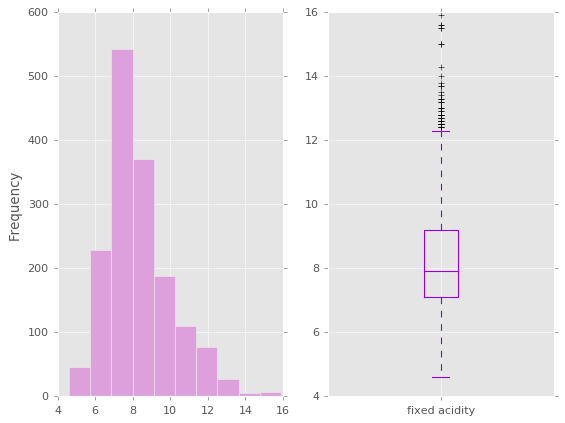

In [147]:
Graficos(wine,'fixed acidity','#DDA0DD' ,'#9400D3')

**Acidez volátil**

In [148]:
Resumen(wine,'volatile acidity')

,Media,Std,Mínimo,Q1,Mediana,Q3,Máximo,Skewness,Kurtosis
Valor,0.528,0.179,0.12,0.39,0.52,0.64,1.58,0.671,1.218


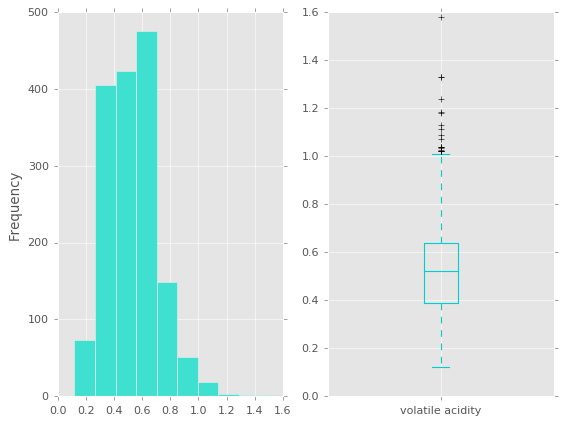

In [149]:
Graficos(wine,'volatile acidity', '#40E0D0', '#00CED1')

**Ácido cítrico**

In [150]:
Resumen(wine, 'citric acid')

,Media,Std,Mínimo,Q1,Mediana,Q3,Máximo,Skewness,Kurtosis
Valor,0.271,0.195,0.0,0.09,0.26,0.42,1.0,0.318,-0.79


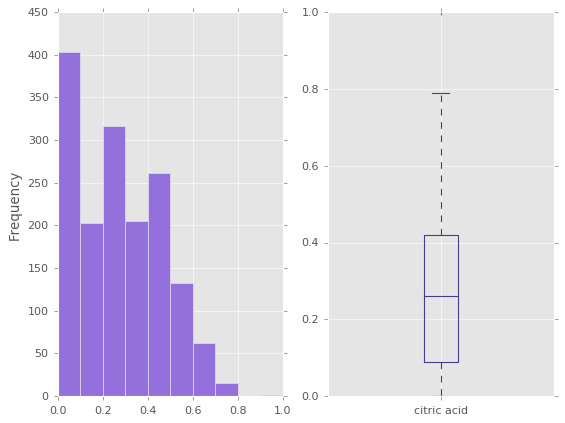

In [151]:
Graficos(wine, 'citric acid', '#9370DB', '#483D8B')

**Azúcar residual**

In [152]:
Resumen(wine,'residual sugar')

,Media,Std,Mínimo,Q1,Mediana,Q3,Máximo,Skewness,Kurtosis
Valor,2.539,1.41,0.9,1.9,2.2,2.6,15.5,4.536,28.524


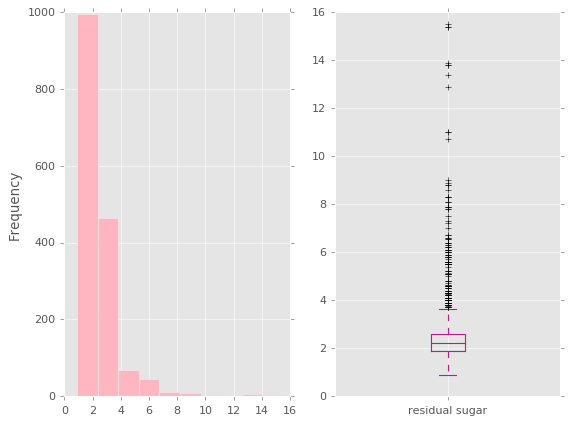

In [153]:
Graficos(wine, 'residual sugar', '#FFB6C1','#C71585')

**Cloruros**

In [154]:
Resumen(wine,'chlorides')

,Media,Std,Mínimo,Q1,Mediana,Q3,Máximo,Skewness,Kurtosis
Valor,0.087,0.047,0.012,0.07,0.079,0.09,0.611,5.675,41.582


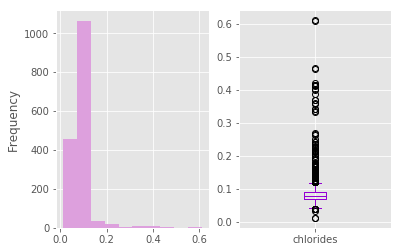

In [19]:
Graficos(wine,'chlorides','#DDA0DD' ,'#9400D3')

**Dióxido de azufre libre**

In [20]:
Resumen(wine,'free sulfur dioxide')

,Media,Std,Mínimo,Q1,Mediana,Q3,Máximo,Skewness,Kurtosis
Valor,15.875,10.46,1.0,7.0,14.0,21.0,72.0,1.249,2.013


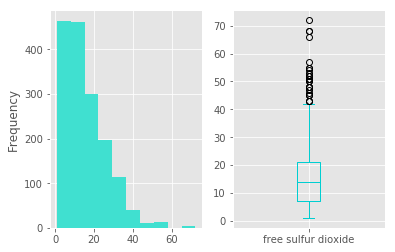

In [21]:
Graficos(wine,'free sulfur dioxide', '#40E0D0', '#00CED1')

**Dióxido de azufre total**

In [22]:
Resumen(wine,'total sulfur dioxide')

,Media,Std,Mínimo,Q1,Mediana,Q3,Máximo,Skewness,Kurtosis
Valor,46.468,32.895,6.0,22.0,38.0,62.0,289.0,1.514,3.794


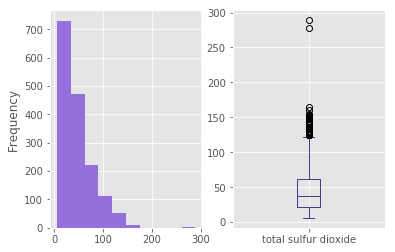

In [23]:
Graficos(wine, 'total sulfur dioxide', '#9370DB', '#483D8B')

**Densidad**

In [24]:
Resumen(wine,'density')

,Media,Std,Mínimo,Q1,Mediana,Q3,Máximo,Skewness,Kurtosis
Valor,0.997,0.002,0.99,0.996,0.997,0.998,1.004,0.071,0.927


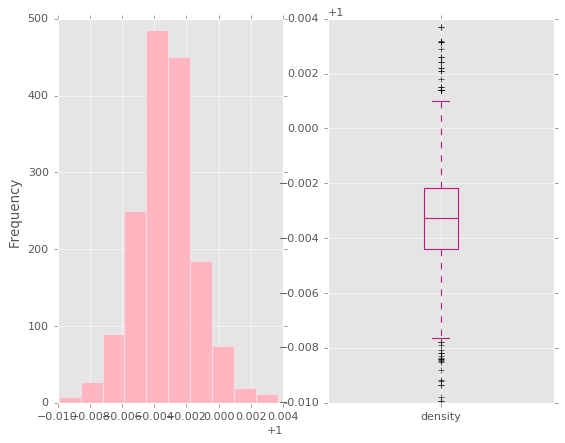

In [135]:
Graficos(wine, 'density', '#FFB6C1','#C71585')

**pH** 

In [26]:
Resumen(wine,'pH')

,Media,Std,Mínimo,Q1,Mediana,Q3,Máximo,Skewness,Kurtosis
Valor,3.311,0.154,2.74,3.21,3.31,3.4,4.01,0.194,0.801


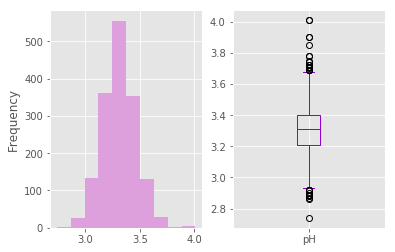

In [27]:
Graficos(wine,'pH','#DDA0DD' ,'#9400D3')

**Sulfatos**

In [28]:
Resumen(wine,'sulphates')

,Media,Std,Mínimo,Q1,Mediana,Q3,Máximo,Skewness,Kurtosis
Valor,0.658,0.17,0.33,0.55,0.62,0.73,2.0,2.426,11.68


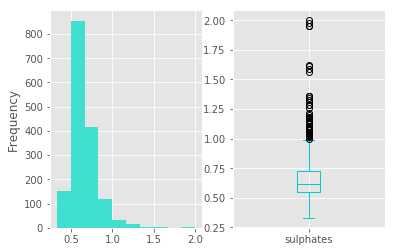

In [29]:
Graficos(wine,'sulphates', '#40E0D0', '#00CED1')

**Alcohol**

In [30]:
Resumen(wine,'alcohol')

,Media,Std,Mínimo,Q1,Mediana,Q3,Máximo,Skewness,Kurtosis
Valor,10.423,1.066,8.4,9.5,10.2,11.1,14.9,0.86,0.196


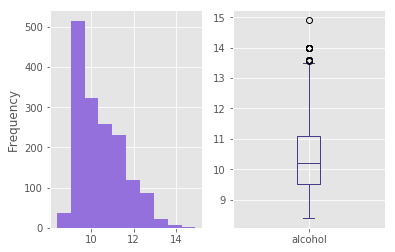

In [31]:
Graficos(wine, 'alcohol', '#9370DB', '#483D8B')

**Calidad**

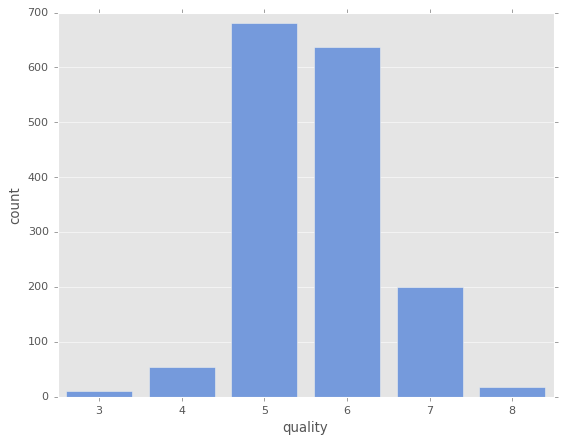

In [155]:
sns.countplot(x='quality', data=wine, color = '#6495ED')

En este caso nos interesa ver si un vino es de buena calidad o mala calidad, para esto se va a considerar que un vino es de buena calidad si tiene una calidad mayor o igual a 6 y de mala calidad si tiene una calidad menor a 6.

In [156]:
wine = wine.assign(Calidad = lambda x: (x.quality>=6 ) * 1 )

In [129]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


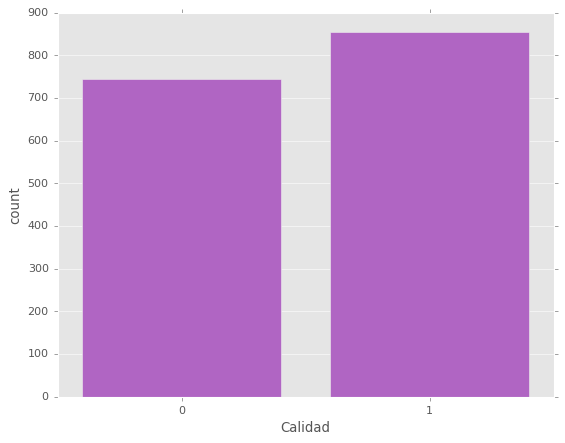

In [157]:
sns.countplot(x='Calidad', data=wine, color = '#BA55D3')

In [158]:
print('Tabla de Valores')
print(wine['Calidad'].value_counts(sort = False))
print(' ')
print('Tabla de Porcentajes')
print(wine['Calidad'].value_counts(sort = False) / wine.shape[0])

Tabla de Valores
0    744
1    855
Name: Calidad, dtype: int64
 
Tabla de Porcentajes
0    0.465291
1    0.534709
Name: Calidad, dtype: float64


Vemos que la variable respuesta se encuentra relativamente balanceada en la data, lo cual simplifica las consideraciones al momento de dividir la base en entrenamiento y validación. 

## Análisis Multivariado

In [36]:
wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


Como se puede apreciar en la tabla de correlación se tiene que las variables más correlacionadas son:

* fixed acidity - citric acid 
* fixed acidity - density
* fixed acidity - pH
* volatile acidity - citric acid
* citric acid - pH
* free sulfur dioxide - total sulfur dioxide

## Limpieza

In [40]:
def remove_out(df,variable):
    
    for i in variable:
        p_25 = np.percentile(df[i], 25)
        p_75 = np.percentile(df[i], 75)
        df = df[(df[i]< (p_75 + (p_75 - p_25) * 1.5)) & (df[i]> (p_25 - (p_75 - p_25) * 1.5))]
        
    return df

In [41]:
datos = remove_out(wine,['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

In [42]:
datos.shape

(1135, 13)

Removimos los datos extremos para todas las variables utilizando el método de Tuckeyy, eliminando 464 registros.

In [43]:
print('Tabla de Valores')
print(datos['Calidad'].value_counts(sort = False))
print(' ')
print('Tabla de Porcentajes')
print(datos['Calidad'].value_counts(sort = False) / datos.shape[0])

Tabla de Valores
0    524
1    611
Name: Calidad, dtype: int64
 
Tabla de Porcentajes
0    0.461674
1    0.538326
Name: Calidad, dtype: float64


Los porcentajes de la variable respuesta se mantienen, por lo que la limpieza no alteró la base de manera significativa en este ámbito. 

## Base de entrenamiento y validación

In [44]:
def particion(df, ptrain=0.7):
    ptest=1-ptrain
    particion = train_test_split(df.index, test_size = ptest)
    train = df.loc[particion[0]]
    test = df.loc[particion[1]]
    
    return train, test

In [46]:
train, test = particion(datos)

Exportamos las bases al momento de realizar la división de manera que no cambien los análisis realizados: 

In [47]:
#train.to_csv('train.csv', decimal = ',', sep=' ', encoding='utf-8')
#test.to_csv('test.csv', decimal = ',', sep=' ', encoding='utf-8')

In [82]:
wine_train = pd.read_table('train.csv', 
                          header = 0,
                          sep = ' ',
                          decimal = ',',
                          index_col = 0)
wine_test = pd.read_table('test.csv', 
                          header = 0,
                          sep = ' ',
                          decimal = ',',
                          index_col = 0)

In [91]:
wine_train.rename(columns = {'fixed acidity' : 'fixed_acidity',
                                 'volatile acidity' : 'volatile_acidity',
                                 'citric acid' : 'citric_acid',
                                 'residual sugar' : 'residual_sugar',
                                 'free sulfur dioxide' : 'free_sulfur_dioxide',
                                'total sulfur dioxide' : 'total_sulfur_dioxide'}, inplace = True)

In [94]:
wine_test.rename(columns = {'fixed acidity' : 'fixed_acidity',
                                 'volatile acidity' : 'volatile_acidity',
                                 'citric acid' : 'citric_acid',
                                 'residual sugar' : 'residual_sugar',
                                 'free sulfur dioxide' : 'free_sulfur_dioxide',
                                'total sulfur dioxide' : 'total_sulfur_dioxide'}, inplace = True)

## Componentes Principales

Escalamos las variables para poder aplicar componentes principales y escoger aquellas que expliquen una gran cantidad de variabilidad, reduciendo la dimensionalidad

In [159]:
ytr, Xtr = patsy.dmatrices("""Calidad ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar +
                            chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol """,
                           data = wine_train)

yte, Xte = patsy.dmatrices("""Calidad ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar +
                            chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol """,
                           data = wine_test)

In [160]:
scaler = StandardScaler()
scaler.fit(Xtr)

Xtr_scal = scaler.transform(Xtr)
Xte_scal = scaler.transform(Xte)

In [161]:
pca = PCA(.95)
pca.fit(Xtr_scal, ytr)
pca.n_components_

9

In [162]:
Xtr = pca.transform(Xtr_scal)
Xte = pca.transform(Xte_scal)

## Ajuste de Modelos

### 1) Regresión Logística

In [163]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
mod = logreg.fit(Xtr, np.ravel(ytr))

In [164]:
pred_lr = (logreg.predict_proba(Xte)[:,1]>0.5)*1
matriz_confusion = metrics.confusion_matrix(yte, pred_lr)

In [165]:
#Tasa de verdaderos positivos y falsos positivos
tn, fp, fn, tp = matriz_confusion.ravel()
tpr = tp/(tp + fn)
fpr = fp/(fp + tn)
print(tpr, fpr)

0.735632183908046 0.24550898203592814


In [166]:
#AUC
roc = metrics.roc_curve(yte, pred_lr)
metrics.auc(roc[0], roc[1])

0.7450616009360589

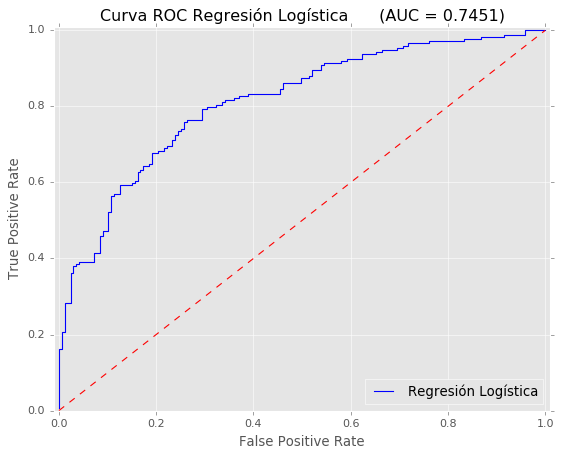

In [200]:
fpr, tpr, umbral = roc_curve(yte, logreg.predict_proba(Xte)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística', color = 'blue')
plt.plot([0, 1], [0, 1],'r--', color = 'red')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Regresión Logística      (AUC = ' +str(np.round(metrics.auc(roc[0], roc[1]), 4))+')' )
plt.legend(loc="lower right")
plt.show()

### 2) Random Forest

In [174]:
rf = RandomForestClassifier(n_estimators = 200)
rffit = rf.fit(Xtr, np.ravel(ytr))
preds_prob = rffit.predict_proba(Xte)
preds_rf = (preds_prob[:,1]>0.5)*1

In [175]:
metrics.confusion_matrix(yte, preds_rf)

array([[121,  46],
       [ 27, 147]], dtype=int64)

In [177]:
rocrf = metrics.roc_curve(yte, preds_prob[:, 1])

In [181]:
print(metrics.auc(rocrf[0], rocrf[1]))

0.8858661986372083


In [182]:
rf.feature_importances_

array([0.08771543, 0.24592594, 0.12125202, 0.10200666, 0.07204296,
       0.08062784, 0.11772052, 0.07283788, 0.09987075])

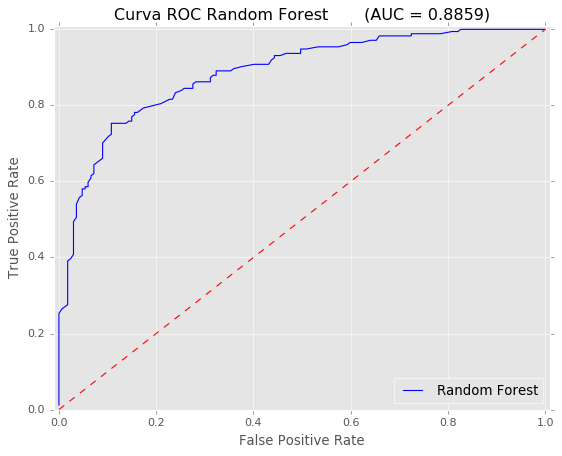

In [199]:
plt.plot(rocrf[0], rocrf[1], label = 'Random Forest', color = 'blue')
plt.plot([0,1], [0,1], 'r--', color = 'red')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Random Forest       (AUC = ' +str(np.round(metrics.auc(rocrf[0], rocrf[1]), 4))+')' )
plt.legend(loc="lower right")
plt.show()

### 3) Logistic GAM

In [183]:
gam = LogisticGAM().fit(Xtr, ytr)
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     87.7071
Link Function:                        LogitLink Log Likelihood:                                  -334.3772
Number of Samples:                          794 AIC:                                              844.1687
                                                AICc:                                             866.7663
                                                UBRE:                                               3.1516
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3879
Feature Function   Data Type      Num

In [184]:
preds_gam = gam.predict_proba(Xte)
roc_gam = metrics.roc_curve(yte, preds_gam)
print(metrics.auc(roc_gam[0], roc_gam[1]))

0.8335742308486476


In [185]:
pred_gam = (gam.predict(Xte)*1)

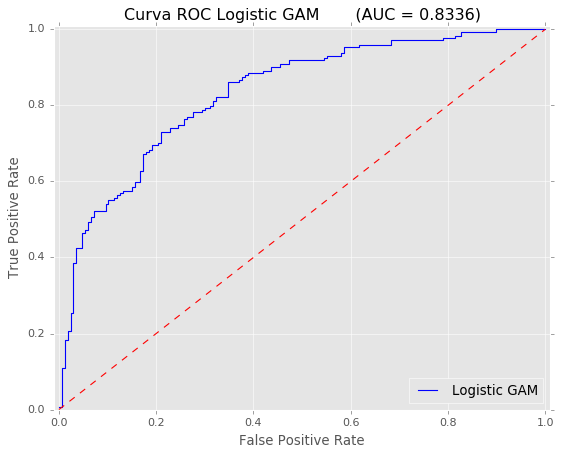

In [198]:
plt.plot(roc_gam[0], roc_gam[1], label = 'Logistic GAM', color = 'blue')
plt.plot([0,1], [0,1], 'r--', color = 'red')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Logistic GAM       (AUC = ' +str(np.round(metrics.auc(roc_gam[0], roc_gam[1]), 4))+')' )
plt.legend(loc="lower right")
plt.show()

### 4) SVM

In [188]:
from sklearn.svm import SVC
my_svm = SVC(C = 1, kernel = 'poly', probability = True)
my_svm = my_svm.fit(Xtr, np.ravel(ytr))
preds_svm = my_svm.predict_proba(Xte)

In [194]:
roc_svm = metrics.roc_curve(yte, preds_svm[:, 1])
print(metrics.auc(roc_svm[0], roc_svm[1]))

0.7865303875008605


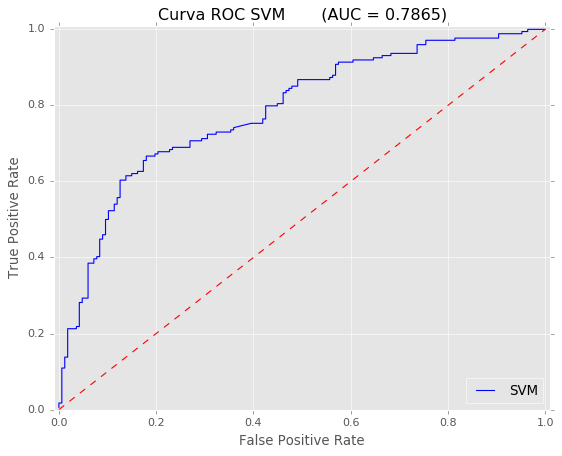

In [206]:
plt.plot(roc_svm[0], roc_svm[1], label = 'SVM', color = 'blue')
plt.plot([0,1], [0,1], 'r--', color = 'red')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC SVM       (AUC = ' +str(np.round(metrics.auc(roc_svm[0], roc_svm[1]), 4))+')' )
plt.legend(loc="lower right")
plt.show()

### 5) Naive Bayes

In [203]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb = nb.fit(Xtr,np.ravel(ytr))
preds_nb = nb.predict_proba(Xte)


In [205]:
roc_nb = metrics.roc_curve(yte, preds_nb[:, 1])
print(metrics.auc(roc_nb[0], roc_nb[1]))

0.7943423497831922


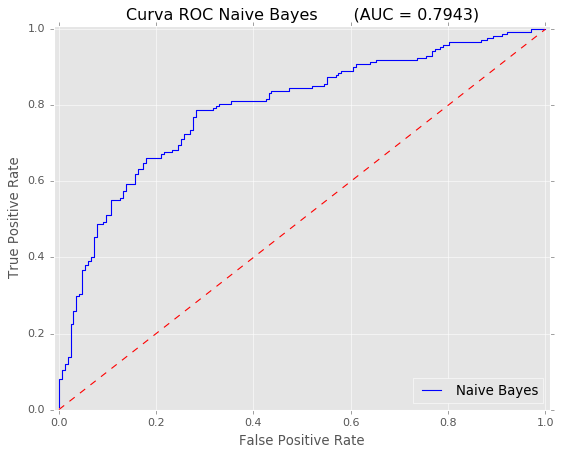

In [207]:
plt.plot(roc_nb[0], roc_nb[1], label = 'Naive Bayes', color = 'blue')
plt.plot([0,1], [0,1], 'r--', color = 'red')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Naive Bayes       (AUC = ' +str(np.round(metrics.auc(roc_nb[0], roc_nb[1]), 4))+')' )
plt.legend(loc="lower right")
plt.show()